In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
Numpy version 1.13.3
Pandas version 0.22.0
Matplotlib version 2.1.2


In [2]:
df_gh_srz = pd.read_csv('df_tgas_hip_srez.csv',
                     #sep="\s+", 
                     #skiprows=1,
                     #usecols=[1,100],
                     #names=name_col
                    )

In [3]:
df_gh_srz.head(10)

,Unnamed: 0,hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,...,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat,parallax_hip,parallax_error_hip,parallax_difference,parallax_difference_abs
0,0,1,NaN,1635378410781933568,2738327524223598464,985215,2015.0,0.000872,0.521615,1.088980,...,8.961080,NOT_AVAILABLE,97.185846,-59.187304,0.434029,0.998757,4.55,1.33,-2.644640,2.644640
1,2,3,NaN,1635378410781933568,2881742976228516992,824535,2015.0,0.005057,0.614117,38.859270,...,6.606388,NOT_AVAILABLE,112.090065,-22.927583,17.774821,35.142344,2.26,0.36,-0.590597,0.590597
2,3,4,NaN,1635378410781933568,4973386036426283264,234891,2015.0,0.009045,0.157519,-51.893538,...,7.967318,NOT_AVAILABLE,-39.207721,-63.415496,-26.886873,-46.217681,7.45,0.77,0.078284,0.078284
3,4,5,NaN,1635378410781933568,2305974984968767232,1133156,2015.0,0.009974,0.246131,-40.591167,...,8.223755,NOT_AVAILABLE,-22.102124,-72.861717,-18.812426,-36.656694,3.88,0.95,1.255879,1.255879
4,5,6,NaN,1635378410781933568,2740326848679651200,1705542,2015.0,0.019617,0.294792,3.946412,...,11.615140,NOT_AVAILABLE,99.220773,-56.542398,1.589883,3.612503,18.17,5.81,2.872015,2.872015
5,6,7,NaN,1635378410781933568,2846308877560478464,1803143,2015.0,0.021066,0.201562,20.035302,...,9.247472,NOT_AVAILABLE,106.817969,-41.224050,8.272506,18.311983,17.28,1.16,-1.857201,1.857201
6,9,10,NaN,1635378410781933568,4976500987227870464,300648,2015.0,0.036696,0.118590,-50.866804,...,8.458978,NOT_AVAILABLE,-38.195124,-64.340579,-26.026151,-45.384348,10.83,1.00,-0.236017,0.236017
7,10,11,NaN,1635378410781933568,387133543014624384,1346136,2015.0,0.037403,0.328360,46.939988,...,7.332709,NOT_AVAILABLE,113.905512,-15.030896,23.087006,42.080251,4.18,0.60,0.968971,0.968971
8,11,12,NaN,1635378410781933568,2308086871927817344,962921,2015.0,0.040873,0.233974,-35.960215,...,7.776446,NOT_AVAILABLE,-9.250497,-75.974778,-16.062456,-32.615366,3.25,0.98,1.466222,1.466222
9,13,14,NaN,1635378410781933568,2449930572059904256,1756401,2015.0,0.048668,0.249245,-0.360489,...,6.813849,NOT_AVAILABLE,96.136008,-60.538434,-0.098730,-0.350107,4.86,0.67,-1.296361,1.296361


In [4]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[179.99997189002639, -179.9952046997528],
 [179.99832093780174, -179.99995069177967],
 [179.99754803477452, -179.99969146506339],
 [89.569467052340485, -89.782381256822831],
 [89.894342605486912, -89.608066280847666],
 [89.482957764117202, -89.662232714280449]]

In [5]:
df_gh_srz['ra'] = df_gh_srz['ra'] + 180
df_gh_srz['dec'] = df_gh_srz['dec'] + 90

df_gh_srz['l'] = df_gh_srz['l'] + 180
df_gh_srz['b'] = df_gh_srz['b'] + 90

df_gh_srz['ecl_lon'] = df_gh_srz['ecl_lon'] + 180
df_gh_srz['ecl_lat'] = df_gh_srz['ecl_lat'] + 90

In [6]:
[[df_gh_srz.ra.max(),df_gh_srz.ra.min()],
[df_gh_srz.l.max(),df_gh_srz.l.min()],
[df_gh_srz.ecl_lon.max(),df_gh_srz.ecl_lon.min()],
[df_gh_srz.dec.max(),df_gh_srz.dec.min()],
[df_gh_srz.b.max(),df_gh_srz.b.min()],
[df_gh_srz.ecl_lat.max(),df_gh_srz.ecl_lat.min()]]

[[359.99997189002636, 0.0047953002471956552],
 [359.99832093780174, 4.9308220326338414e-05],
 [359.99754803477452, 0.0003085349366074297],
 [179.56946705234049, 0.21761874317716945],
 [179.89434260548691, 0.39193371915233399],
 [179.4829577641172, 0.33776728571955061]]

In [7]:
df_gh_srz[['hip','parallax','parallax_hip','parallax_difference','parallax_difference_abs']].sort_values(
    by='parallax_difference_abs', ascending=False).head(75)

,hip,parallax,parallax_hip,parallax_difference,parallax_difference_abs
16538,21000,3.613519,93.67,90.056481,90.056481
32238,42525,5.939341,68.54,62.600659,62.600659
89258,117081,7.767833,63.56,55.792167,55.792167
69953,92059,1.025301,55.49,54.464699,54.464699
12867,16582,3.352539,46.79,43.437461,43.437461
37925,49971,10.032883,53.21,43.177117,43.177117
10858,14101,148.510255,106.16,-42.350255,42.350255
68772,90368,9.239326,51.00,41.760674,41.760674
67064,87784,0.901640,41.30,40.398360,40.398360
8599,11167,1.600522,40.32,38.719478,38.719478


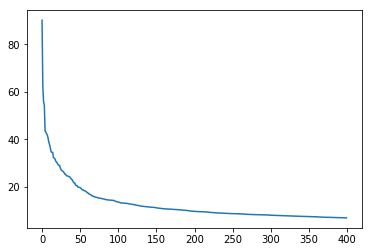

In [42]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:400],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:400])

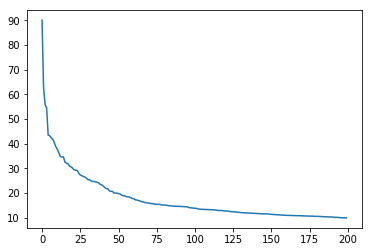

In [54]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200],df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200])

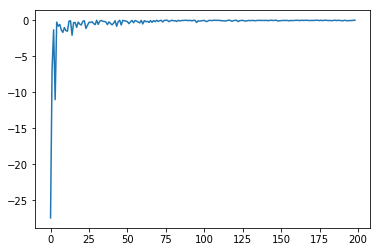

In [55]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-1],np.diff(df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200]))

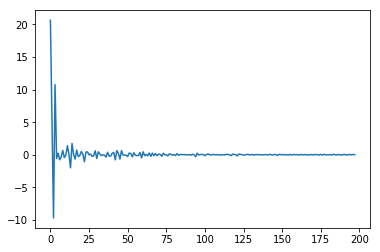

In [56]:
plt.plot([i for i in np.arange(len(df_gh_srz))][:200-2],np.diff(np.diff(df_gh_srz['parallax_difference_abs'].sort_values(ascending=False)[:200])))

In [58]:
import healpy as hp
%matplotlib inline

print('healpy version ' + hp.__version__)

healpy version 1.11.0


In [66]:
FACT = lambda N: 1 if ( N <= 1) else N*FACT(N-1) 

#np.float64(3.1415926535897932384626433832795),np.float128(np.pi)


from decimal import *
getcontext().prec = 20
PI = Decimal('3.1415926535897932384626433832795')




def FACT2(N1,N2):
# ! Произведение чисел от N1 до N2 
# INTEGER(4), INTENT(IN) :: N1,N2
# INTEGER(4) ::  I
    
    fact2 = 1
    for i in np.arange(N1, N2+1):
        fact2 = fact2*i
    return fact2 

In [122]:
def A(M,N,K):
    Up = 1.
    for i in np.arange(0,2*M):
        Up = Up * (N - K - i)
    
    Dn = 1.
    for i in np.arange(1,M+1):
        Dn = Dn * 2 * i * (2 * (N - i) + 1)
    #tosha^.^
    if (M % 2 == 0):
        return Up/Dn
    else:
        return -Up/Dn
    

def NORM(N,K):
    Up = 1.
    for i in np.arange(N+1,2*N+1):
        Up = Up * i
    Dn = 1.
    for i in np.arange(1, N-K+1):
        Dn = Dn * i
    
    Up = Up / Dn
    
    for i in np.arange(1, N+1):
        Up = Up * 0.5
    return Up

    
def PL(N,K,D):
#Присоединенный полином Лежанжра P_nk
#N,K  - Индексы полинома
#D    - Склонение или галактическая широта в градусах!'''
    if (N<K): return 0. 
    
    D = D
#    X = np.sin(D)
#заменили - для случа, когда у нас D изменяется от 0 до pi, на этот отрезке sin(D), эевивалентно -cos(D)
    X = - np.cos(D)
    F = (N - K) / 2
    
    if (F == 0):
        Z = X **(N-K) * np.sqrt(1-X**2) ** K
    else:
        Z = X ** (N-K)
        for m in np.arange(1,F+1):
            Z = Z + A(m,N,K) * X**(N - K - 2*m)
        Z = Z * np.sqrt(1 - X ** 2) ** K
    return NORM(N,K)*Z


def INDEXJ(N,K,L):
    #Вычисление индекса J=N**2+2*K+L-1
    return N ** 2 + 2 * K + L-1

def INDEXES(J):
#Вычисление индексов N,K,L по индексу J (J=N**2+2*K+L-1)
    N = int(np.sqrt(J))
    K = J - N ** 2
    if (K % 2 == 0):
        L = 1
    else:
        L = 0
    K = (K - L + 1) / 2
    return N,int(K),int(L)

def FK(N,K,L,A,D):
#Ненормированная сферическая функция
    if (K == 0):
        return PL(N, 0, D)
    else:
        if (L == 0):
            return PL(N, K, D) * np.sin(K * A)
        else:
            return PL(N, K, D) * np.cos(K * A)
        
        
def FR(N,K):
#! Норма сферической функции
    fr = np.sqrt((2*N+1)/(4.*np.float64(PI)))
    if (K > 0):
        fr=fr*np.sqrt(2.0/FACT2(N-K+1,N+K))
    return fr
    
    
    
    
def FV(N,K,L,A,D):
# ! Нормированная сферическая функция
#INTEGER, INTENT (IN) :: N,K,L
#REAL(8), INTENT (IN) :: A,D ! В градусах
    return FR(N,K) * FK(N,K,L,A,D)

def FVJ(J,A,D):
# ! Нормированная сферическая функция от одного индекса
# INTEGER, INTENT (IN) :: J
# REAL(8), INTENT (IN) :: A,D ! В градусах
#широта (0 -180) b theta, dec, lat
#долгота (0 - 360) l phi, ra, lon
    N,K,L = INDEXES(J)
    return FV(N,K,L,A,D)

In [123]:
NSIDE = 10
sfet_f_n = 36
nside_a_n = NSIDE**2 * 12


n_array_nside = np.arange(hp.nside2npix(NSIDE))

Y = np.zeros(nside_a_n)
Ny = np.zeros(nside_a_n)
Am = np.zeros((nside_a_n, sfet_f_n))

In [124]:
def get_Y(arg_l = 'l', arg_b = 'b', arg_summ = 'parallax_difference_abs'):
    ii = lambda b,l: hp.ang2pix(10,b/180*np.pi,l/180*np.pi)

    Ny_ = np.zeros(nside_a_n)

    for i in ii(df_gh_srz[arg_b],df_gh_srz[arg_l]):
        Ny_[i] += 1

    Y_ = np.zeros(nside_a_n)
    for i,rm in zip(ii(df_gh_srz[arg_b],df_gh_srz[arg_l]),df_gh_srz[arg_summ]):
        Y_[i] += rm
    return Y_ / Ny_

Y0 = get_Y('ra','dec')
Y1 = get_Y()
Y2 = get_Y('ecl_lon','ecl_lat')

In [125]:

Am = np.zeros((nside_a_n, sfet_f_n))

for i in n_array_nside:
    lib, lil  = list(hp.pix2ang(NSIDE, i))
    for j in np.arange(sfet_f_n):
        Am[i][j] = FVJ(j, lil,lib)
        #Am[i][j] = FVJ(j, lib,lil)
        
Am[0]

array([  2.82094792e-01,  -4.86973837e-01,   2.81859615e-02,
         2.81859615e-02,   6.24485812e-01,  -6.28156401e-02,
        -6.28156401e-02,   3.63575839e-03,   2.22625994e-19,
        -7.31487739e-01,   1.04584824e-01,   1.04584824e-01,
        -9.58724815e-03,  -5.87049638e-19,   2.26540351e-04,
        -2.26540351e-04,   8.18285919e-01,  -1.52074152e-01,
        -1.52074152e-01,   1.87452622e-02,   1.14781627e-18,
        -6.77355648e-04,   6.77355648e-04,   3.39500044e-21,
        -2.77222824e-05,  -8.89365798e-01,   2.04187691e-01,
         2.04187691e-01,  -3.14798618e-02,  -1.92758560e-18,
         1.49144723e-03,  -1.49144723e-03,  -1.12224095e-20,
         9.16379278e-05,  -1.67726809e-06,  -1.67726809e-06])

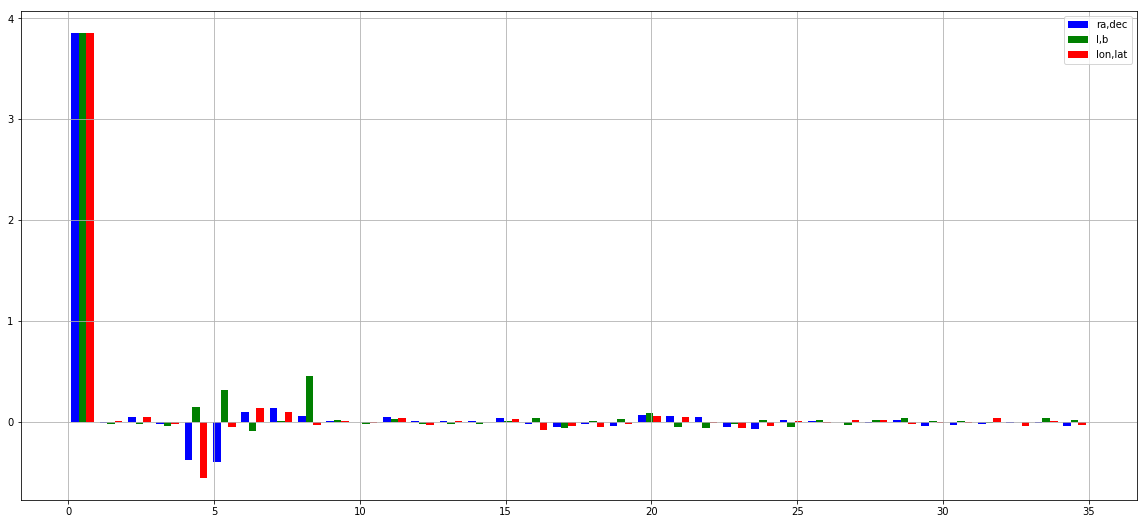

In [167]:
X2 = np.linalg.lstsq(Am,Y2)
X1 = np.linalg.lstsq(Am,Y1)
X0 = np.linalg.lstsq(Am,Y0)

'''import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot([i for i in np.arange(X0[2])],X0[0], 'bx', label='ra,dec')
plt.plot([i for i in np.arange(X1[2])],X1[0], 'gx', label='l,b')
plt.plot([i for i in np.arange(X2[2])],X2[0], 'rx', label='lon,lat')
#plt.axis([0, 6, 0, 20])
plt.title('eclipt')
plt.legend()

plt.show()
'''

n_bins = X0[2]
plt.figure(figsize=(20,9))
colors = ['blue','green','red']
labels = ['ra,dec','l,b','lon,lat']
xx = [ i for i in np.arange(n_bins)]
plt.hist([xx,xx,xx], n_bins, weights = [X0[0],X1[0],X2[0]],histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.grid()

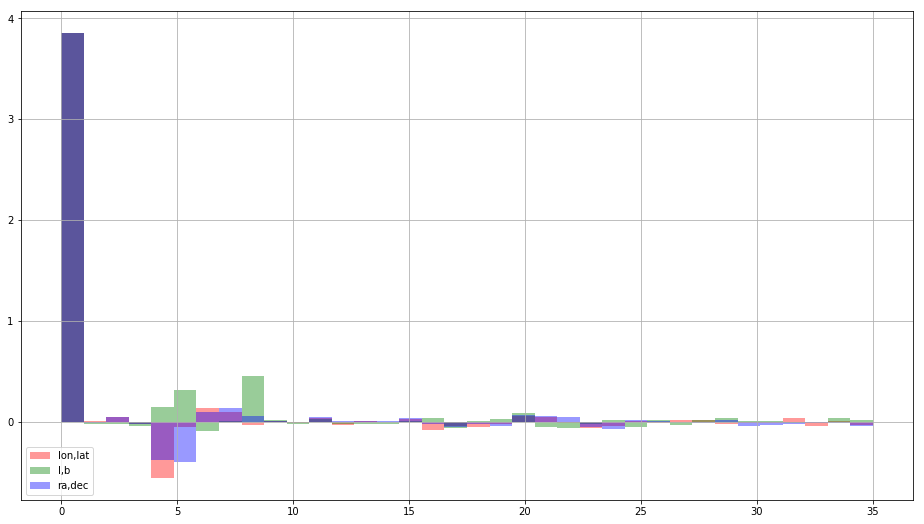

In [169]:

n_bins = X0[2]
plt.figure(figsize=(16,9))
colors = ['blue','green','red']
labels = ['ra,dec','l,b','lon,lat']
xx = [ i for i in np.arange(n_bins)]
plt.hist([xx,xx,xx], n_bins, weights = [X0[0],X1[0],X2[0]],histtype='stepfilled', color=colors, label=labels, alpha=0.4)
plt.legend(prop={'size': 10})
plt.grid()

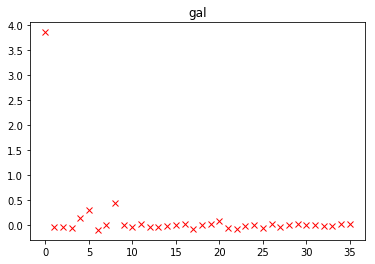

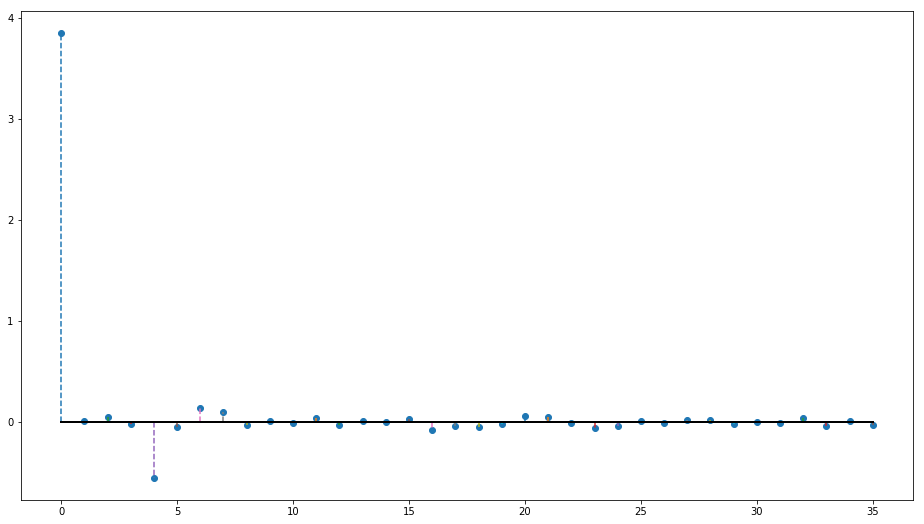

In [170]:

plt.figure(figsize=(16,9))
markerline, stemlines, baseline = plt.stem(xx, X2[0], '--')
plt.setp(baseline, 'color', 'k', 'linewidth', 2)

plt.show()